# Project 1 : Image Classification and Regression

Author: Lina Mezghani

In [185]:
#From mp1.py

import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

## Simple Classification

#### Build the training set

In [7]:
#From mp1.py

def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [9]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Y_train = np_utils.to_categorical(Y_train, 3)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


#### Train the models

I computed a function train that takes as input the training set, the loss, the optimizer and the number of epochs.

In [12]:
from keras.layers import Dense
from keras.models import Sequential

def train(X_train, Y_train, loss, optimizer, nb_epochs) : 
    model = Sequential()
    model.add(Dense(3, activation = 'softmax'))

    model.compile(loss=loss, optimizer=optimizer, metrics = ['accuracy'])

    return model.fit(X_train, Y_train, epochs=nb_epochs, batch_size=16), model

First, we try the Stochastic Gradient Descent optimizer with mean squared error loss. We train the model for 100 epochs

In [25]:
loss = 'mean_squared_error'
optimizer = 'sgd'
nb_epochs = 100

history_sgd, model_sgd = train(X_train, Y_train, loss, optimizer, nb_epochs)

Epoch 1/100
300/300 [==============================] - 1s 3ms/step - loss: 0.3706 - acc: 0.3000
Epoch 2/100
300/300 [==============================] - 0s 246us/step - loss: 0.2902 - acc: 0.3833
Epoch 3/100
300/300 [==============================] - 0s 252us/step - loss: 0.2600 - acc: 0.4367
Epoch 4/100
300/300 [==============================] - 0s 262us/step - loss: 0.1684 - acc: 0.6200
Epoch 5/100
300/300 [==============================] - 0s 236us/step - loss: 0.1592 - acc: 0.6500
Epoch 6/100
300/300 [==============================] - 0s 264us/step - loss: 0.1640 - acc: 0.6633
Epoch 7/100
300/300 [==============================] - 0s 249us/step - loss: 0.1377 - acc: 0.6933
Epoch 8/100
300/300 [==============================] - 0s 236us/step - loss: 0.1169 - acc: 0.7400
Epoch 9/100
300/300 [==============================] - 0s 257us/step - loss: 0.1081 - acc: 0.7767
Epoch 10/100
300/300 [==============================] - 0s 246us/step - loss: 0.1134 - acc: 0.7467
Epoch 11/100
300/300 

Then, we try the Adam optimizer with the categorical crossentropy loss. Again, we train it for 100 epochs.

In [26]:
loss = 'categorical_crossentropy'
optimizer = 'adam'
nb_epochs = 100

history_adam, model_adam = train(X_train, Y_train, loss, optimizer, nb_epochs)


Epoch 1/100
300/300 [==============================] - 1s 4ms/step - loss: 2.3086 - acc: 0.3400
Epoch 2/100
300/300 [==============================] - 0s 314us/step - loss: 0.7678 - acc: 0.5900
Epoch 3/100
300/300 [==============================] - 0s 324us/step - loss: 0.5122 - acc: 0.7667
Epoch 4/100
300/300 [==============================] - 0s 319us/step - loss: 0.3606 - acc: 0.8633
Epoch 5/100
300/300 [==============================] - 0s 333us/step - loss: 0.2833 - acc: 0.9100
Epoch 6/100
300/300 [==============================] - 0s 367us/step - loss: 0.2587 - acc: 0.9133
Epoch 7/100
300/300 [==============================] - 0s 325us/step - loss: 0.2211 - acc: 0.9533
Epoch 8/100
300/300 [==============================] - 0s 306us/step - loss: 0.1806 - acc: 0.9900
Epoch 9/100
300/300 [==============================] - 0s 317us/step - loss: 0.1633 - acc: 0.9867
Epoch 10/100
300/300 [==============================] - 0s 353us/step - loss: 0.1787 - acc: 0.9367
Epoch 11/100
300/300 

We plot losses for both models. We notice that for the Adam optimizer, the loss is smoother than for the SGD optimizer. We also notice that it converges faster to zero.

In [50]:
def plot_history(history, metric_to_plot, optimizer_name) :
    plt.plot(history.history[metric_to_plot][1:])
    plt.title('model train '+ metric_to_plot +' for '+optimizer_name+' optimizer')
    plt.ylabel(metric_to_plot)
    plt.xlabel('epoch')
    plt.legend([optimizer_name+' optimizer'], loc='best')
    plt.show()

def plot_histories(history_sgd, history_adam, metric_to_plot) :
    plt.plot(history_sgd.history[metric_to_plot][1:])
    plt.plot(history_adam.history[metric_to_plot][1:])
    plt.title('model train '+ metric_to_plot +' for SGD and Adam optimizers')
    plt.ylabel(metric_to_plot)
    plt.xlabel('epoch')
    plt.legend(['SGD optimizer', 'Adam optimizer'], loc='upper right')
    plt.show()

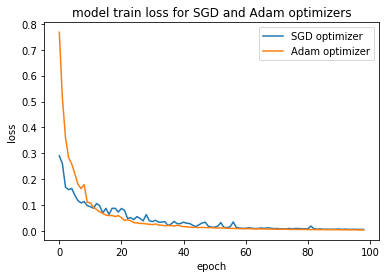

In [28]:
plot_histories(history_sgd, history_adam, 'loss')

#### Test the models

We generate 100 random disks, rectangles and triangles, and see the prediction of the model for both optimizers. In both cases, we obtain (almost) 100% accuracy

In [29]:
def test_model(model) :
    n_tests = 100
    test_passed = 0

    for i in range(n_tests) :
        #Test for a random disk
        X_test = generate_a_disk()
        X_test = X_test.reshape(1, X_test.shape[0])
        if np.argmax(model_sgd.predict(X_test)) == 1 :
            test_passed += 1
        #Test for a random rectangle
        X_test = generate_a_rectangle()
        X_test = X_test.reshape(1, X_test.shape[0])
        if np.argmax(model_sgd.predict(X_test)) == 0 :
            test_passed += 1
        #Test for a random triangle
        X_test = generate_a_triangle()[0]
        X_test = X_test.reshape(1, X_test.shape[0])
        if np.argmax(model_sgd.predict(X_test)) == 2 :
            test_passed += 1
    return test_passed, n_tests*3

test_passed, n_tests = test_model(model_sgd)
print("Passed " + str(test_passed) + " out of " + str(n_tests) + " tests with SGD optimizer." )

test_passed, n_tests = test_model(model_adam)
print("Passed " + str(test_passed) + " out of " + str(n_tests) + " tests with Adam optimizer." )


Passed 300 out of 300 tests with SGD optimizer.
Passed 300 out of 300 tests with Adam optimizer.


## Visualization of the solution

We visualize the weights of the first layer of the network for both models.

In [30]:
def visualize_weights(model) :
    x = model.get_weights()[0]
    fig, axarr = plt.subplots(1,3)
    titles = ['rectangle', 'disk', 'triangle']
    for i in range(3) :
        axarr[i].set_title(titles[i])
        axarr[i].imshow(x[:, i].reshape(72,72))

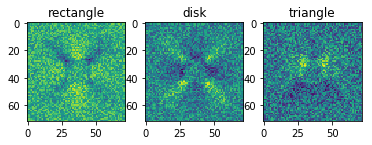

In [31]:
visualize_weights(model_sgd)

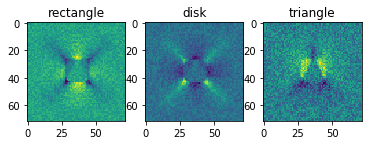

In [32]:
visualize_weights(model_adam)

We notice that the weights are noisier in the network with the sgd optimizer than the adam optimizer. 

## A more difficult classification problem

In [52]:
[X_train, Y_train] = generate_dataset_classification(2000, 20, True)

Y_train = np_utils.to_categorical(Y_train, 3)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990


We first try to train the same simple model as before, but this time on a trainig set of size 2000, with adam optimizer and categorical crossentropy loss.

In [53]:
loss = 'categorical_crossentropy'
optimizer = 'adam'
nb_epochs = 200

history_simple, model_simple = train(X_train, Y_train, loss, optimizer, nb_epochs)

Epoch 1/200
2000/2000 [==============================] - 2s 1ms/step - loss: 1.1850 - acc: 0.4730
Epoch 2/200
2000/2000 [==============================] - 1s 354us/step - loss: 1.1280 - acc: 0.5375
Epoch 3/200
2000/2000 [==============================] - 1s 321us/step - loss: 0.8890 - acc: 0.5675
Epoch 4/200
2000/2000 [==============================] - 1s 377us/step - loss: 1.0442 - acc: 0.5445
Epoch 5/200
2000/2000 [==============================] - 1s 324us/step - loss: 0.9094 - acc: 0.5945
Epoch 6/200
2000/2000 [==============================] - 1s 375us/step - loss: 0.9929 - acc: 0.5835
Epoch 7/200
2000/2000 [==============================] - 1s 327us/step - loss: 0.9992 - acc: 0.5635
Epoch 8/200
2000/2000 [==============================] - 1s 342us/step - loss: 0.8769 - acc: 0.6065
Epoch 9/200
2000/2000 [==============================] - 1s 315us/step - loss: 1.0219 - acc: 0.5685
Epoch 10/200
2000/2000 [==============================] - 1s 308us/step - loss: 0.9542 - acc: 0.5960
E

Let's plot the accuracy of the model during training:

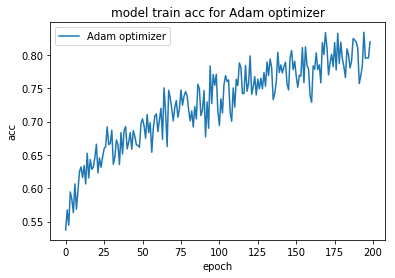

In [55]:
plot_history(history_simple, 'acc', 'Adam')

Now we test the model on 300 examples.

In [39]:
[X_test, Y_test] = generate_dataset_classification(300, 20, True)
Y_test = np_utils.to_categorical(Y_test, 3)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [54]:
[loss_simple, accuracy_simple] = model_simple.evaluate(X_test, Y_test)
print('Accuracy of the model :', accuracy_simple)

300/300 [==============================] - 0s 1ms/step
Accuracy of the model : 0.563333332935969


We achieve a training accuracy of 0.83, and the test accuracy remains low, at 0.56. This means that the model is overfitting on the training set. The network that is used is too simple, so we are going to try a convolutionnal network. As suggested in the paper, we are going to use a convolutionnal layer with 16 5x5 filters, a pooling layer, and a fully connected layer. We train it on the same training set as before, for 30 epochs.

In [61]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras import optimizers

model_conv = Sequential()
model_conv.add(Conv2D(16, (5, 5), activation = 'relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)))
model_conv.add(MaxPooling2D(pool_size = (2,2)))
model_conv.add(Flatten())
model_conv.add(Dense(3, activation = 'softmax'))

model_conv.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

X_train_reshaped = np.reshape(X_train, (X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1))

history_conv = model_conv.fit(X_train_reshaped, Y_train, epochs=30, batch_size=32)

Epoch 1/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.8813 - acc: 0.6135
Epoch 2/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5794 - acc: 0.7770
Epoch 3/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.4586 - acc: 0.8460
Epoch 4/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.3351 - acc: 0.9065
Epoch 5/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2903 - acc: 0.9150
Epoch 6/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2231 - acc: 0.9410
Epoch 7/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1896 - acc: 0.9455
Epoch 8/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1602 - acc: 0.9605
Epoch 9/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1279 - acc: 0.9675
Epoch 10/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1178 - acc: 0.9760
Epoch 11/30
2000/2000 [======

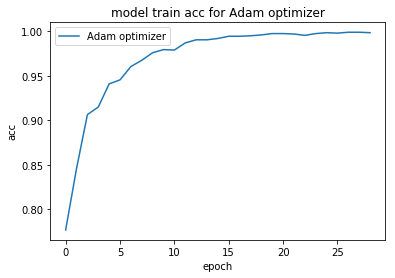

In [62]:
plot_history(history_conv, 'acc', 'Adam')

In [63]:
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1))

[loss_conv, accuracy_conv] = model_conv.evaluate(X_test_reshaped, Y_test)
print('Accuracy of the model :', accuracy_conv)

300/300 [==============================] - 1s 2ms/step
Accuracy of the model : 0.9433333325386047


We obtain an accuracy of 0.94 on the test set after only 30 epochs. 

## A Regression Problem

In [67]:
#From mp1.py

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

In [88]:
[X_train, Y_train] = generate_dataset_regression(10000, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

For this regression problem, the order in which the vertices are in Y_train and Y_test is important because two triangles that are identical but not in the same order have a high mean squarred error (and we want it to be 0). To tackle this problem, I propose to sort the vertices of the triangles in Y_train and Y_test by lexicographic order. 

In [128]:
def sort_by_x(Y) :
    Y_sort = Y
    i = 0
    for triangle in Y :
        [a0,a1,b0,b1,c0,c1] = triangle
        a = (a0, a1)
        b = (b0, b1)
        c = (c0, c1)
        l = [a,b,c]
        l.sort()
        sorted_triangle = []
        for element in l :
            sorted_triangle.append(element[0])
            sorted_triangle.append(element[1])
        Y_sort[i] = sorted_triangle
        i+=1
    return Y_sort

Y_train_sort = sort_by_x(Y_train)

I used a deeper model than before, because a simple convolutionnal network as before was not enough. So I computed a network with 4 convolutionnal layers, seperated by maxpooling layers.

In [122]:
model = Sequential()
model.add(Conv2D(16, (5, 5), activation = 'relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (5, 5), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (5, 5), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128, (5, 5), activation = 'relu'))

model.add(Flatten())
model.add(Dense(6))

model.compile(loss='mean_squared_error', optimizer='adadelta')

X_train_reshaped = np.reshape(X_train, (X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1))

model.fit(X_train_reshaped, Y_train_sort, epochs=30, batch_size=32)

Epoch 1/30
10000/10000 [==============================] - 57s 6ms/step - loss: 0.0456
Epoch 2/30
10000/10000 [==============================] - 54s 5ms/step - loss: 0.0158
Epoch 3/30
10000/10000 [==============================] - 52s 5ms/step - loss: 0.0104
Epoch 4/30
10000/10000 [==============================] - 52s 5ms/step - loss: 0.0079
Epoch 5/30
10000/10000 [==============================] - 52s 5ms/step - loss: 0.0066
Epoch 6/30
10000/10000 [==============================] - 52s 5ms/step - loss: 0.0058
Epoch 7/30
10000/10000 [==============================] - 55s 6ms/step - loss: 0.0052
Epoch 8/30
10000/10000 [==============================] - 55s 5ms/step - loss: 0.0045
Epoch 9/30
10000/10000 [==============================] - 56s 6ms/step - loss: 0.0042
Epoch 10/30
10000/10000 [==============================] - 56s 6ms/step - loss: 0.0039
Epoch 11/30
10000/10000 [==============================] - 56s 6ms/step - loss: 0.0036
Epoch 12/30
10000/10000 [===========================

In [77]:
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [130]:
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1))
Y_test_sort = sort_by_x(Y_test)

loss = model.evaluate(X_test_reshaped, Y_test)
print('Loss of the model :', loss)

300/300 [==============================] - 1s 2ms/step
Loss of the model : 0.003189139353732268


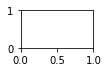

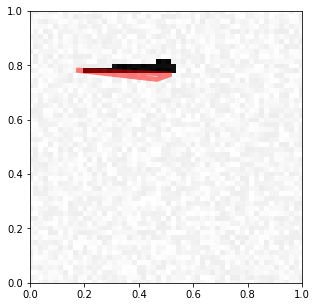

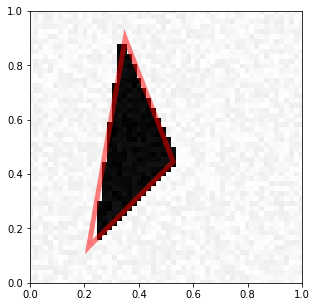

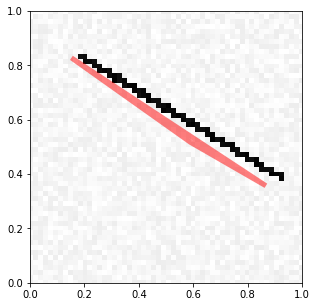

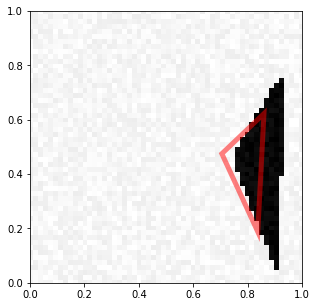

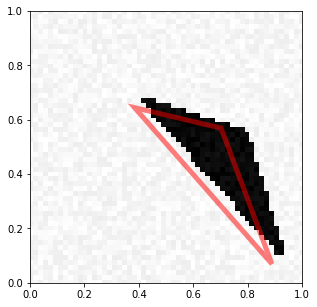

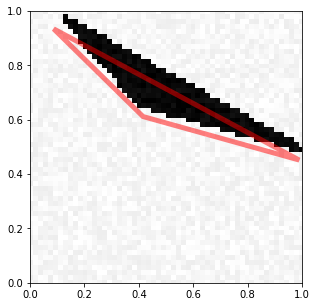

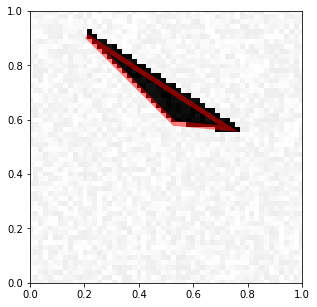

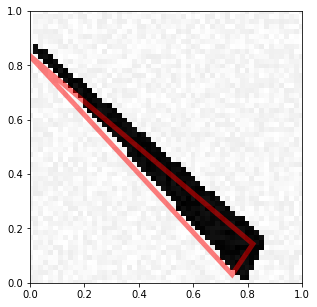

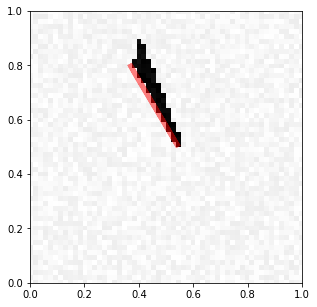

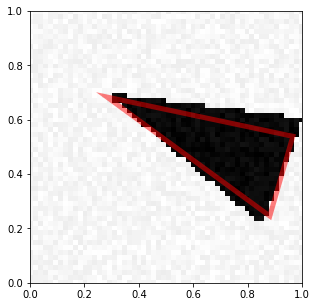

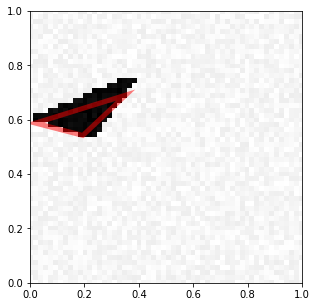

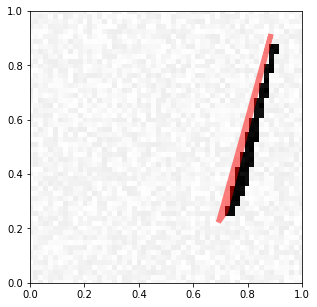

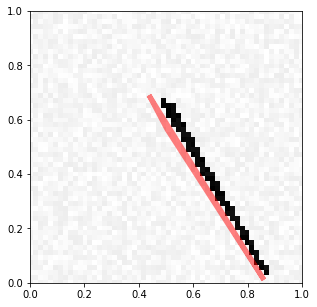

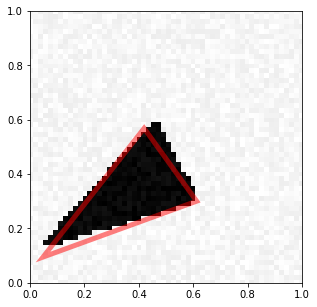

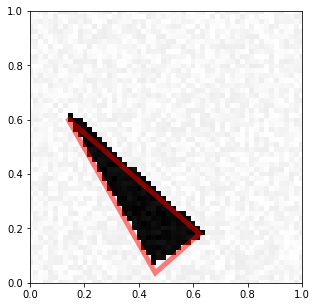

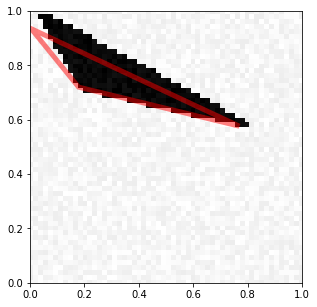

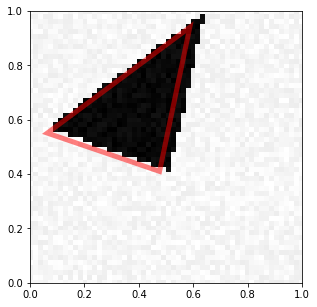

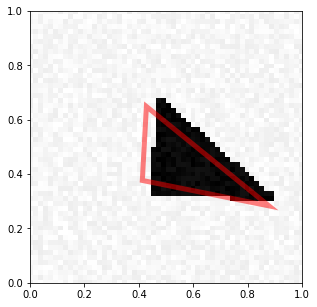

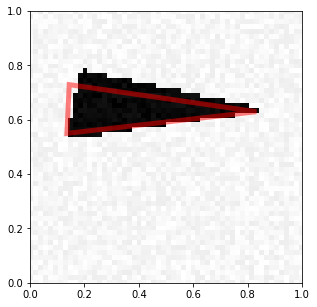

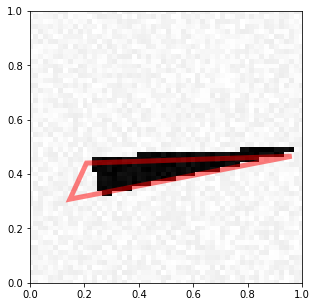

In [124]:
Y_pred = model.predict(X_test_reshaped)

for i in range(1, 21):
    visualize_prediction(X_test[i], Y_pred[i])

Compared to the results trained on the unsorted dataset, we can say that these results are satisfying. We can see that there are some problems when the triangles are very flat. 

Also, we notice that, in some situations where two values of x are very close to each other for two vertices of the same triangle, the prediction of the model is pretty bad. This is due to the fact that we ordered our triangles by vertices with increasing x.

An other solution would have been to adapt the loss function so that it does calculate the min of the mean_squared_error for all 3 combinations of vertices.

## Image Denoising

I first modify the function generate_a_* so that it output an image with a shape and noise in it and the same image without noise.

In [192]:
def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise), generate_a_drawing(figsize, U, V, 0)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise), generate_a_drawing(figsize, U, V, 0)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]], generate_a_drawing(figsize, U, V, 0)

Now I create a function that generates the entire dataset

In [193]:
def generate_dataset_denoising(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples,im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i],Y[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i],Y[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V], Y[i] = generate_a_triangle(noise, free_location)
    X = (X + noise) / (255 + 2 * noise)
    Y = Y/255
    return [X, Y]

In [202]:
X_train, Y_train = generate_dataset_denoising(4000, noise = 50, free_location = True)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

The hourglass network used is based on the 

In [203]:
from keras.layers import Input, UpSampling2D, MaxPool2D
from keras.models import Model

input_img = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))

# "encoded" is the encoded representation of the input
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(64, (3, 3), activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(1, (3, 3), padding='same')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_logarithmic_error')

X_train_reshaped = np.reshape(X_train, (X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1))
Y_train_reshaped = np.reshape(Y_train, (Y_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1))

autoencoder.fit(X_train_reshaped, Y_train_reshaped, epochs=5, batch_size=64)


Epoch 1/5
4000/4000 [==============================] - 258s 65ms/step - loss: 0.0516
Epoch 2/5
4000/4000 [==============================] - 250s 62ms/step - loss: 0.0080
Epoch 3/5
4000/4000 [==============================] - 248s 62ms/step - loss: 0.0040
Epoch 4/5
4000/4000 [==============================] - 251s 63ms/step - loss: 0.0032
Epoch 5/5
4000/4000 [==============================] - 285s 71ms/step - loss: 0.0027


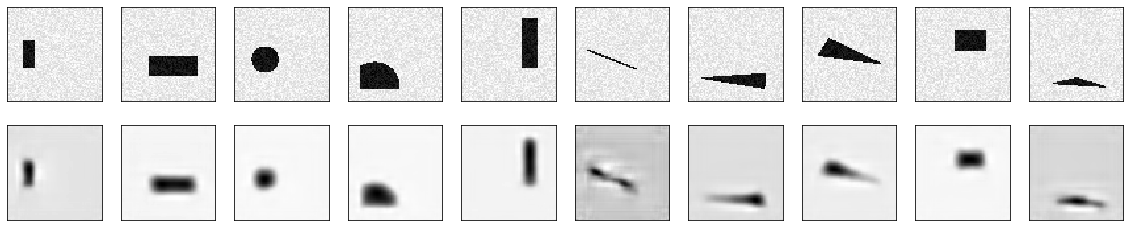

In [204]:
n = 10

decoded_imgs = autoencoder.predict(X_train_reshaped[:10])

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_train[i].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap="gray")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, n + i + 1)
    plt.imshow(decoded_imgs[i].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap="gray")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()